In [4]:
import ipystata


> note: 如果使用`pystata`
>
>  ```python
>  import stata_setup
>  stata_setup.config(r'c:/program files/stata17', 'mp',splash=False)
>  ```

## Examining the variables first

In [5]:
%%stata

use https://rmilab.nkust.edu.tw/files/bookdata/lecture/data101.dta
describe csat expense percent income high college region
summarize csat expense percent income high college region
//To check correlation matrix of the variables we are interested in, type:
pwcorr csat expense percent income high college, star(0.05) sig

no; dataset in memory has changed since last saved
r(4);

Variable      Storage   Display    Value
    name         type    format    label      Variable label
---------------------------------------------------------------------------------
csat            int     %9.0g                 Mean composite SAT score
expense         int     %9.0g                 Per pupil expenditures prim&sec
percent         byte    %9.0g                 % HS graduates taking SAT
income          double  %10.0g                Median household income, $1,000
high            float   %9.0g                 % adults HS diploma
college         float   %9.0g                 % adults college degree
region          byte    %9.0g      region     Geographical region

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        csat |         51     944.098    66.93497        832       1093
     expense |         51    5235.961   

 
In the table, numbers are Pearson correlation coefficients, go from -1 to 1. Closer to 1 means strong correlation. A negative value indicates an inverse relationship (roughly, when one goes up the other goes down).


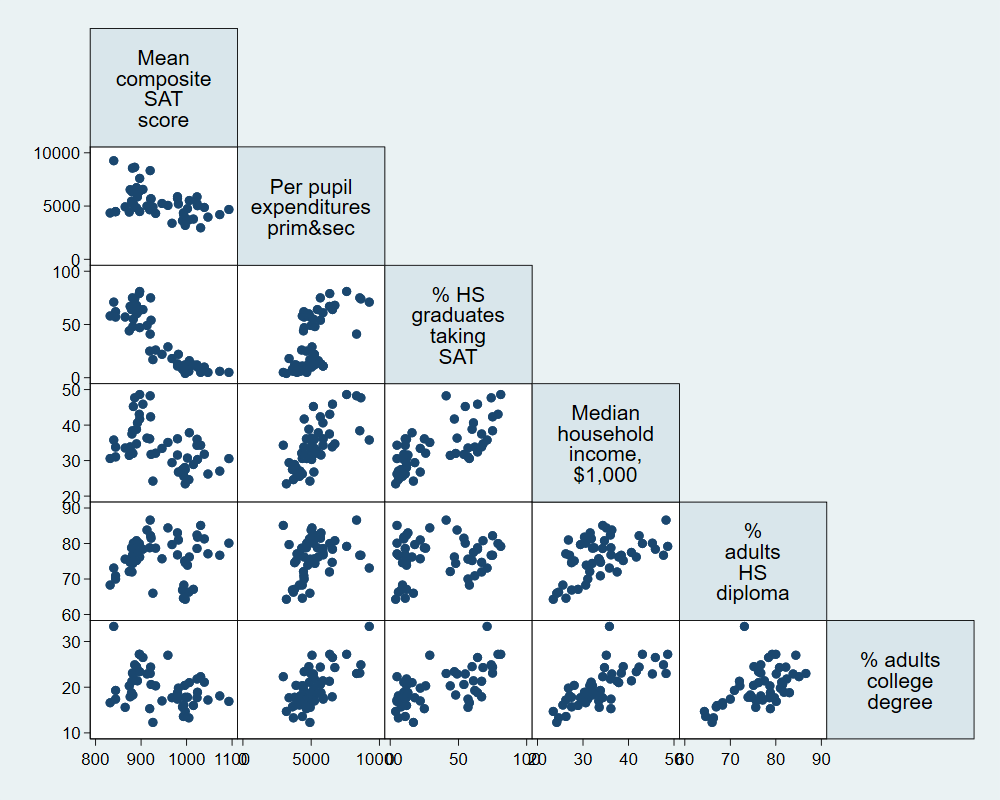

In [6]:
%%stata
graph matrix csat expense percent income high college, half

### Running simple linear regression models
To run a simple linear regression model which pertains to one dependent variable and one independent variable, type:

In [7]:
%%stata
regress csat expense


      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(1, 49)        =     13.61
       Model |  48708.3001         1  48708.3001   Prob > F        =    0.0006
    Residual |   175306.21        49  3577.67775   R-squared       =    0.2174
-------------+----------------------------------   Adj R-squared   =    0.2015
       Total |   224014.51        50   4480.2902   Root MSE        =    59.814

------------------------------------------------------------------------------
        csat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |  -.0222756   .0060371    -3.69   0.001    -.0344077   -.0101436
       _cons |   1060.732    32.7009    32.44   0.000     995.0175    1126.447
------------------------------------------------------------------------------



 
Interpretation of the outputs:

- Prob > F = 0.0006 : This is the p-value of the model. It tests the null hypothesis that the R-square is equal to 0. To reject the null hypothesis, usually we need a p-value lower than 0.05. Here, the p-value of 0.0006 indicates a statistically significant relationship between X and Y.
- R-squared = 0.2174   : R-square shows the amount of variance of Y explained by X. In this case expense explains 22% of the variance in SAT scores.
- Adj R-squared = 0.2015  : Adjusted R-square shows the same as R-square but adjusted by the # of cases and # of variables. When the # of variables is small and the # of cases is very large then Adj R-square is closer to R-square. This provides a more honest association between X and Y.
- Root MSE = 59.814 : root mean squared error, is the sd of the regression. The closer to zero better the fit.
- The estimated coefficient for expense is  -.0222756. This means for each one-point increase in expense, SAT scores decrease by 0.022 points.
The t-values test the null hypothesis that each coefficient is 0. To reject this, you need a t-value greater than 1.96 (for 95% confidence). You can get . the t-values by dividing the coefficient by its standard error. The t-values also show the importance of a variable in the model.
- P>|t| = 0.001 : The two-tailed p-value tests the null hypothesis that the coefficient is equal to 0 (i.e. no significant effect). To reject this, the p-value has to be lower than 0.05 (you could choose also an alpha of 0.10). In this case, expense is statistically significant in explaining SAT.
 

To run a multiple/multivariable linear regression model which pertains to one dependent variable and two or more than two independent variables, type:


In [8]:
%%stata
regress csat expense percent income high college



      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(5, 45)        =     42.23
       Model |  184663.309         5  36932.6617   Prob > F        =    0.0000
    Residual |  39351.2012        45  874.471137   R-squared       =    0.8243
-------------+----------------------------------   Adj R-squared   =    0.8048
       Total |   224014.51        50   4480.2902   Root MSE        =    29.571

------------------------------------------------------------------------------
        csat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |   .0033528   .0044709     0.75   0.457     -.005652    .0123576
     percent |  -2.618177   .2538491   -10.31   0.000    -3.129455   -2.106898
      income |   .1055853   1.166094     0.09   0.928    -2.243048    2.454218
        high |   1.630841    .992247     1.64   0.

Interpretation of the outputs:

- Prob > F = 0.0000 : This is the p-value of the model. It indicates the reliability of X to predict Y. Usually we need a p-value lower than 0.05 to show a statistically significant relationship between X and Y.
- R-squared = 0.8243 : R-square shows the amount of variance of Y explained by X. In this case the model explains 82.43% of the variance in SAT scores.
- Adj R-squared = 0.8048 :  Adjusted R-square shows the same as R2but adjusted by the # of cases and # of variables. When the # of variables is small and the # of cases is very large then Adj R square is closer to R square. This provides a more honest association between X and Y.
- Root MSE = 29.571 : Root mean squared error, is the sd of the regression. The closer to zero better the fit.
- The estimated coefficient for  expense is  .0033528. This means for each one-point increase in expense, SAT scores increase by 0.003 points, holding all other variables constant. However, this increase is not statistically significant as the p-value is not < 0.05. The estimated coefficient for  percent is  -2.618177. This means for each one-point increase in percent, SAT scores decrease significantly by 2.62 points, holding all other variables constant.  

>Interpretations for the other estimated coefficients are similar to the explained two variables.

- The t-values test the null hypothesis that each coefficient is 0. To reject this, you need a t-value greater than 1.96 (for 95% confidence). You can get the t-values by dividing the coefficient by its standard error. The t-values also show the importance of a variable in the model. In this case, percent is the most important.
- Two-tail p-values test the null hypothesis that each coefficient is 0. To reject this, the p-value has to be lower than 0.05 (you could choose also an alpha of 0.10). In this case, expense, income, high, and college are not statistically significant in explaining SAT. percent is the only variable that has significant impact on SAT (i.e., its coefficient is significantly different from 0).
 

Plotting the predicted values against observed values

One of the ways to say how good the model is will depend on how well it predicts Y.

We can generate the predicted values of Y (usually called Yhat) given the model by using predict immediately after running the regression. Type:


In [9]:
%%stata

regress csat expense percent income high college
predict csat_predict
label variable csat_predict "csat predicted"


      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(5, 45)        =     42.23
       Model |  184663.309         5  36932.6617   Prob > F        =    0.0000
    Residual |  39351.2012        45  874.471137   R-squared       =    0.8243
-------------+----------------------------------   Adj R-squared   =    0.8048
       Total |   224014.51        50   4480.2902   Root MSE        =    29.571

------------------------------------------------------------------------------
        csat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |   .0033528   .0044709     0.75   0.457     -.005652    .0123576
     percent |  -2.618177   .2538491   -10.31   0.000    -3.129455   -2.106898
      income |   .1055853   1.166094     0.09   0.928    -2.243048    2.454218
        high |   1.630841    .992247     1.64   0.

上面產生預測值 csat_predict

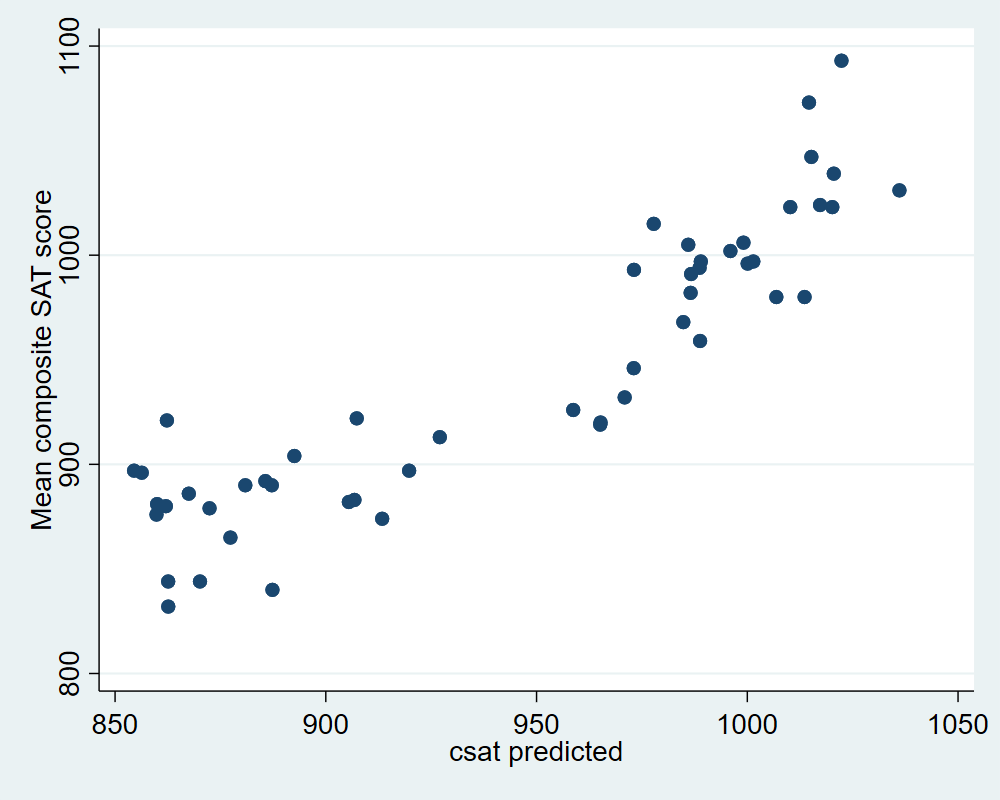

In [10]:
%%stata
scatter csat csat_predict



如果45度,表示應該OK

## Regression output table for more than one model
To show the outputs for more than one model in a single table side-by-side, you can use the commands eststo and esttab:


In [11]:
%%stata
regress csat expense
eststo model1
regress csat expense percent income high college
eststo model2
xi: regress csat expense percent income high college i.region
eststo model3
esttab, r2 ar2 se scalar(rmse)



      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(1, 49)        =     13.61
       Model |  48708.3001         1  48708.3001   Prob > F        =    0.0006
    Residual |   175306.21        49  3577.67775   R-squared       =    0.2174
-------------+----------------------------------   Adj R-squared   =    0.2015
       Total |   224014.51        50   4480.2902   Root MSE        =    59.814

------------------------------------------------------------------------------
        csat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |  -.0222756   .0060371    -3.69   0.001    -.0344077   -.0101436
       _cons |   1060.732    32.7009    32.44   0.000     995.0175    1126.447
------------------------------------------------------------------------------

      Source |       SS           df       MS    

## Transferring regression outputs to word or excel file
The command outreg2 gives us the option to export regression output to word or excel file. To do this, we have to first install the user-written outreg2 package. For installing, type:
```
ssc install outreg2
```
For transferring regression outputs with one model to a word file, type:


In [12]:
%%stata
regress csat expense
outreg2 using myreg.doc, replace ctitle(Model 1)



      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(1, 49)        =     13.61
       Model |  48708.3001         1  48708.3001   Prob > F        =    0.0006
    Residual |   175306.21        49  3577.67775   R-squared       =    0.2174
-------------+----------------------------------   Adj R-squared   =    0.2015
       Total |   224014.51        50   4480.2902   Root MSE        =    59.814

------------------------------------------------------------------------------
        csat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |  -.0222756   .0060371    -3.69   0.001    -.0344077   -.0101436
       _cons |   1060.732    32.7009    32.44   0.000     995.0175    1126.447
------------------------------------------------------------------------------

myreg.doc
dir : seeout



Windows users: click on myreg.doc to open the file in Word (you can replace this name with your own). Otherwise, follow the Mac instructions.

Mac users: click on dir to go to the directory where myreg.doc is saved, and open it with Word (you can replace this name with your own)

The outputs in the word document look as follows.
![](regress101.files/outreg2.png)

We can add more models (e.g., Model 2, Model 3) to the Word document by using the option append (NOTE: make sure to close myreg.doc)


In [13]:
%%stata
regress csat expense percent
outreg2 using myreg.doc, append ctitle(Model 2)
regress csat expense percent income high college
outreg2 using myreg.doc, append ctitle(Model 3)



      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(2, 48)        =     88.01
       Model |  176015.074         2  88007.5372   Prob > F        =    0.0000
    Residual |  47999.4355        48  999.988239   R-squared       =    0.7857
-------------+----------------------------------   Adj R-squared   =    0.7768
       Total |   224014.51        50   4480.2902   Root MSE        =    31.623

------------------------------------------------------------------------------
        csat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |   .0086041   .0042044     2.05   0.046     .0001505    .0170577
     percent |    -2.5377   .2249117   -11.28   0.000    -2.989915   -2.085485
       _cons |   989.8074   18.39577    53.81   0.000     952.8202    1026.795
--------------------------------------------------


The outputs in the Word document look as follows.

![](regress101.files/outreg21.png)

 
You also have the option to export the outputs to Excel. Use the extension *.xls.

##. Robust regression
We run robust regression to control for heteroskedasticity. By default, Stata assumes homoskedastic standard errors, so if we have heteroskedastic variance, we need to adjust it by adding robust option in the regress command. Type:


In [14]:
%%stata
regress csat expense percent income high college, robust



Linear regression                               Number of obs     =         51
                                                F(5, 45)          =      50.90
                                                Prob > F          =     0.0000
                                                R-squared         =     0.8243
                                                Root MSE          =     29.571

------------------------------------------------------------------------------
             |               Robust
        csat | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |   .0033528    .004781     0.70   0.487    -.0062766    .0129823
     percent |  -2.618177   .2288594   -11.44   0.000    -3.079123    -2.15723
      income |   .1055853   1.207246     0.09   0.931    -2.325933    2.537104
        high |   1.630841    .943318     1.73   0.091    -.2690989    3.530781
     college |

 
## Regression with dummy/categorical variables
When we add categorical variables in regression, we need to add n-1 dummy variables. Here ‘n’ is the number of categories in the variable.
In the example below, variable ‘industry’ has twelve categories (type tab industry, or tab industry, nolabel)

The easiest way to include a set of dummies in a regression is by using the prefix “i.”  By default, the first category (or lowest value) is
used as a reference. For example:


In [15]:
%%stata
sysuse nlsw88.dta,clear  // this is the Stata in-built dataset we will use for this example
tab industry
tab industry, nolabel
reg wage hours i.industry


(NLSW, 1988 extract)

               Industry |      Freq.     Percent        Cum.
------------------------+-----------------------------------
  Ag/Forestry/Fisheries |         17        0.76        0.76
                 Mining |          4        0.18        0.94
           Construction |         29        1.30        2.24
          Manufacturing |        367       16.44       18.68
 Transport/Comm/Utility |         90        4.03       22.72
 Wholesale/Retail trade |        333       14.92       37.63
Finance/Ins/Real estate |        192        8.60       46.24
    Business/Repair svc |         86        3.85       50.09
      Personal services |         97        4.35       54.44
  Entertainment/Rec svc |         17        0.76       55.20
  Professional services |        824       36.92       92.11
  Public administration |        176        7.89      100.00
------------------------+-----------------------------------
                  Total |      2,232      100.00

   Industry |

 
- To include all categories by suppressing the constant type:
```
reg wage hours bn.industry, robust hascons
```
- To change the reference category to “Professional services” (category number 11) instead of “Ag/Forestry/Fisheries” (category number 1), use the prefix “ib#.” where “#” is the number of the reference category you want to use; in this case is 11.


In [16]:
%%stata
clear
sysuse nlsw88.dta
reg wage hours ib11.industry



(NLSW, 1988 extract)

      Source |       SS           df       MS      Number of obs   =     2,228
-------------+----------------------------------   F(12, 2215)     =     16.05
       Model |  5922.54753        12  493.545628   Prob > F        =    0.0000
    Residual |  68114.0215     2,215  30.7512512   R-squared       =    0.0800
-------------+----------------------------------   Adj R-squared   =    0.0750
       Total |   74036.569     2,227  33.2449794   Root MSE        =    5.5454

--------------------------------------------------------------------------------
          wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
---------------+----------------------------------------------------------------
         hours |   .0723658   .0114787     6.30   0.000     .0498557    .0948759
               |
      industry |
Ag/Forestry~s  |  -2.094988   1.359033    -1.54   0.123    -4.760101    .5701247
       Mining  |   7.233343   2.779684     2.60   0.009     1.7


## Regression: interaction between dummies
Interaction terms are needed whenever there is reason to believe that the effect of one independent variable depends on the value of another independent variable. We will explore here the interaction between two dummy (binary) variables. In the example below, the effect of the student-teacher ratio on test scores may depend on the percentage of English learners in the district*.

To upload the data in Stata, type:


In [17]:
%%stata
use https://rmilab.nkust.edu.tw/files/bookdata/lecture/data101_2.dta,clear
ds


observatio~r  gr_span       meal_pct      expn_stu      read_scr
dist_cod      enrl_tot      computer      str           math_scr
county        teachers      testscr       avginc
district      calw_pct      comp_stu      el_pct



In [18]:
%%stata
generate hi_str = 0 if str<20. 
replace hi_str=1 if str>=20
generate hi_el = 0 if el_pct<10. 
replace hi_el=1 if el_pct>=10
generate str_el = hi_str*hi_el

(182 missing values generated)

(182 real changes made)

(192 missing values generated)

(192 real changes made)




- Dependent variable (Y): Average test score, variable testscr in the dataset.

- Independent variables (X)
  - Binary hi_str, where ‘0’ if the student-teacher ratio (str) is lower than 20, ‘1’ if it is 20 or higher.
    
    In Stata, first generate hi_str = 0 if str<20. Then replace hi_str=1 if str>=20

  - Binary hi_el, where ‘0’ if English learners (el_pct) is lower than 10%, ‘1’ equal to 10% or higher

    In Stata, first generate hi_el = 0 if el_pct<10. Then replace hi_el=1 if el_pct>=10

  - Interaction term str_el = hi_str * hi_el. In Stata: generate str_el = hi_str*hi_el

We run the regression


In [19]:
%%stata
regress testscr hi_el hi_str str_el, robust



Linear regression                               Number of obs     =        420
                                                F(3, 416)         =      60.20
                                                Prob > F          =     0.0000
                                                R-squared         =     0.2956
                                                Root MSE          =     16.049

------------------------------------------------------------------------------
             |               Robust
     testscr | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       hi_el |  -18.16295   2.345952    -7.74   0.000    -22.77435   -13.55155
      hi_str |  -1.907842   1.932215    -0.99   0.324    -5.705964    1.890279
      str_el |  -3.494335   3.121226    -1.12   0.264    -9.629677    2.641006
       _cons |   664.1433   1.388089   478.46   0.000     661.4147    666.8718
--------------


Interpretation:

From the above outputs we can write the following equation:

testscr_hat = 664.1 –18.1*hi_el –1.9*hi_str –3.5*str_el

- The effect of hi_str on the tests scores is -1.9 but given the interaction term (and assuming all coefficients are significant), the net effect is -1.9 -3.5*hi_el. If hi_el is 0 then the effect is -1.9 (which is hi_str coefficient), but if hi_el is 1 then the effect is -1.9 - 3.5 = - 5.4. In this case, the effect of student-teacher ratio is more negative in districts where the percent of English learners is higher.

- The average test score in the districts where student-teacher ratio is >= 20 and English learners is >= 10%  is 640.6. To calculate this number, we have to plug in 1 in place of hi_el, hi_str, and str_el in the above equation (i.e., 664.1-18.1 -1.9 - 3.5 = 640.6) .

* We use "California Test Score" data set (caschool.dta) which is used by Stock and Watson (2003) and is downloadable from here.

## Regression: interaction between a dummy and a continuous variable
First, upload the data:


In [20]:
%%stata

use https://rmilab.nkust.edu.tw/files/bookdata/lecture/data101_2.dta,clear
generate hi_el = 0 if el_pct<10. 
replace hi_el=1 if el_pct>=10
generate str_el_dc = str*hi_el


(192 missing values generated)

(192 real changes made)




- Dependent variable (Y): Average test score, variable testscr in the dataset.

- Independent variables (X)

  - Continuous str, student-teacher ratio.

  - Binary hi_el, where ‘0’ if English learners (el_pct) is lower than 10%, ‘1’ equal to 10% or higher.

    - Interaction term str_el_dc = str * hi_el. 
    

We run the regression


In [21]:
%%stata
regress testscr str hi_el str_el_dc, robust



Linear regression                               Number of obs     =        420
                                                F(3, 416)         =      63.67
                                                Prob > F          =     0.0000
                                                R-squared         =     0.3103
                                                Root MSE          =      15.88

------------------------------------------------------------------------------
             |               Robust
     testscr | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         str |  -.9684601   .5891016    -1.64   0.101    -2.126447    .1895268
       hi_el |   5.639141   19.51456     0.29   0.773    -32.72029    43.99857
   str_el_dc |  -1.276613   .9669194    -1.32   0.187     -3.17727    .6240436
       _cons |   682.2458   11.86781    57.49   0.000     658.9175    705.5742
--------------


Interpretation:

From the above outputs we can write the following equation:

testscr_hat = 682.2 – 0.97*str + 5.6*hi_el – 1.28*str_el_dc

The effect of str on testscr will be mediated by hi_el.

If hi_el is 0 (low) then the effect of str is 682.2 –0.97*str.
If hi_el is 1 (high) then the effect of str is 682.2 –0.97*str + 5.6  – 1.28*str = 687.8  – 2.25*str
Notice that how hi_el changes both the intercept and the slope of str. Reducing str by one in low EL districts will increase test scores by 0.97 points, but it will have a higher impact (2.25 points) in high EL districts. The difference between these two effects is1.28 which is the coefficient of the interaction (Stock and Watson, 2003, p.223).

## Regression: interaction between two continuous variables
First, upload the data:


In [22]:
%%stata
use https://rmilab.nkust.edu.tw/files/bookdata/lecture/data101_2.dta,clear
generate str_el_cc = str*el_pct


- Dependent variable (Y): Average test score, variable testscr in the dataset.

- Independent variables (X)

  Continuous str, student-teacher ratio.

  Continuous el_pct, percent of English learners.

  Interaction term str_el_cc = str * el_pct. In Stata: generate str_el_cc = str*el_pct

We run the regression


In [23]:
%%stata
regress testscr str el_pct str_el_cc, robust



Linear regression                               Number of obs     =        420
                                                F(3, 416)         =     155.05
                                                Prob > F          =     0.0000
                                                R-squared         =     0.4264
                                                Root MSE          =     14.482

------------------------------------------------------------------------------
             |               Robust
     testscr | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         str |  -1.117018   .5875135    -1.90   0.058    -2.271884    .0378468
      el_pct |  -.6729116   .3741231    -1.80   0.073    -1.408319    .0624958
   str_el_cc |   .0011618   .0185357     0.06   0.950    -.0352736    .0375971
       _cons |   686.3385   11.75935    58.37   0.000     663.2234    709.4537
--------------


Interpretation:

From the above outputs we can write the following equation:

testscr_hat = 686.3 – 1.12*str - 0.67*el_pct + 0.0012*str_el_cc

The effect of the interaction term is very small. Following Stock & Watson (2003, p.229), algebraically the slope of str is –1.12 + 0.0012*el_pct (remember that str_el_cc is equal to str*el_pct). So:

If el_pct = 10, the slope of str is -1.108

If el_pct = 20, the slope of str is -1.096. A difference in effect of 0.012 points.

In the continuous case there is an effect but is very small (and not significant). See Stock and Watson, 2003, for further details.

# Assumption Diagnostics and Regression Trouble Shooting
We use data from Hamilton (2006) for all the analyses in section  2. To get the data, type:


In [24]:
%%stata
use https://rmilab.nkust.edu.tw/files/bookdata/lecture/data101.dta

no; dataset in memory has changed since last saved
r(4);




## Exploring relationships between the dependent and independent variables
Let us first check the relationship between csat and percent


In [25]:
%%stata
scatter csat percent


variable csat not found
r(111);



For checking the relationship between csat and high type:

In [26]:
%%stata
scatter csat high


variable csat not found
r(111);



There seems to be a curvilinear relationship between csat and percent, and a slightly linear between csat and high. To deal with U-shaped curves we need to add a square version of the variable, in this case percent square

In [27]:
%%stata
generate percent2 = percent^2


percent not found
r(111);



## Checking functional form/linearity
The command `acprplot` (augmented component-plus-residual plot) provides another graphical way to examine the relationship between variables. It does provide good testing for linearity. Run this command after running a regression.


In [28]:
%%stata
regress csat percent high  

variable csat not found
r(111);



In [29]:
%%stata
acprplot percent, lowess


variable percent not found
r(111);



In [30]:

%%stata
acprplot high, lowess

variable high not found
r(111);




The option lowess (locally weighted scatterplot smoothing) draws the observed pattern in the data to help identify nonlinearities. Percent shows a quadratic relation; it makes sense to add a square version of it. High shows a polynomial pattern as well but goes around the regression line (except on the right). We could keep it as is for now.

The linearity corrected model is:
```stata
regress csat percent percent2 high, robust  //👌加入二次項
```

## Testing for homoskedasticity
An important assumption of the classical linear regression model is that the variance in the residuals has to be homoskedastic or constant.

- Graphical way to check homoskedasticity

  When plotting residuals vs. predicted values (Yhat), we should not observe any pattern at all. In Stata, we do this using rvfplot right after running the regression. It will automatically draw a scatter plot between residuals and predicted values.

- A non-graphical way to detect heteroskedasticity is the Breusch-Pagan test. 

  The null hypothesis is that residuals are homoskedastic. In the example below, we do not reject the null at a 95% level and conclude that residuals are heteroscedastic.
  ![](regress101.files/bptest.png)

In [31]:
import ipystata

(U.S. states data 1990-91)

      Source |       SS           df       MS      Number of obs   =        50
-------------+----------------------------------   F(9, 40)        =     70.13
       Model |   200269.84         9  22252.2045   Prob > F        =    0.0000
    Residual |  12691.5396        40   317.28849   R-squared       =    0.9404
-------------+----------------------------------   Adj R-squared   =    0.9270
       Total |   212961.38        49  4346.15061   Root MSE        =    17.813

------------------------------------------------------------------------------
        csat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |   .0014116   .0035983     0.39   0.697    -.0058609     .008684
    percent2 |   .0460468   .0103782     4.44   0.000     .0250717    .0670219
     percent |  -5.945267    .689652    -8.62   0.000    -7.339106   -4.551429
      income |  -.91437

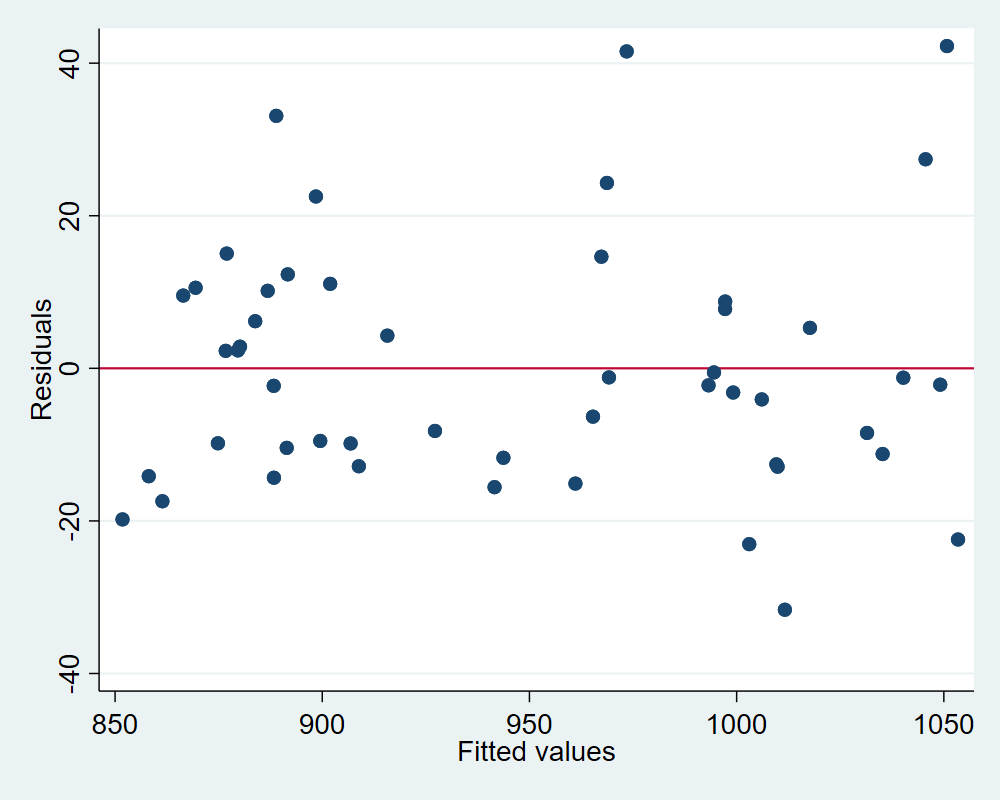

In [32]:
%%stata
use https://rmilab.nkust.edu.tw/files/bookdata/lecture/data101.dta,clear
gen percent2=percent*percent

regress csat expense percent2 percent income high college i.region
rvfplot, yline(0)
hettest

(U.S. states data 1990-91)

      Source |       SS           df       MS      Number of obs   =        50
-------------+----------------------------------   F(8, 41)        =     52.51
       Model |  194023.719         8  24252.9649   Prob > F        =    0.0000
    Residual |  18937.6605        41  461.894159   R-squared       =    0.9111
-------------+----------------------------------   Adj R-squared   =    0.8937
       Total |   212961.38        49  4346.15061   Root MSE        =    21.492

------------------------------------------------------------------------------
        csat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |   -.002021     .00424    -0.48   0.636    -.0105839    .0065419
     percent |  -3.007647   .2328838   -12.91   0.000    -3.477965   -2.537329
      income |  -.1674421   1.035771    -0.16   0.872    -2.259224    1.924339
        high |   1.8147

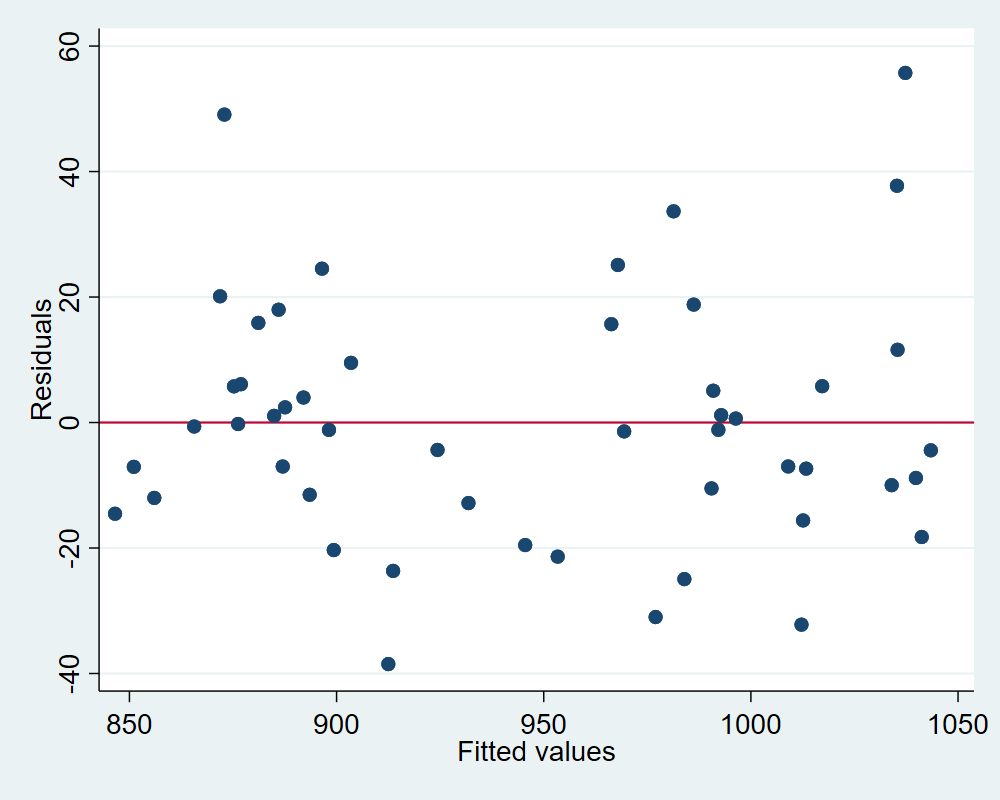

In [33]:
%%stata
use https://rmilab.nkust.edu.tw/files/bookdata/lecture/data101.dta,clear
gen percent2=percent*percent
regress csat expense percent income high college i.region
rvfplot, yline(0)
hettest

Residuals seem to expand slightly at higher levels of Yhat.

The graphical and the Breusch-Pagan test suggest the possible presence of heteroskedasticity in our model. The problem with this is that we may have the wrong estimates of the standard errors for the coefficients and, therefore their t-values.

There are two ways to deal with this problem; one is using heteroskedasticity-robust standard errors, and the other one is using weighted least squares (see Stock and Watson, 2003, chapter 15). WLS requires knowledge of the conditional variance on which the weights are based; if this is known (rarely the case), then use WLS. In practice, it is recommended to use heteroskedasticity-robust standard errors to deal with heteroskedasticity.

By default Stata assumes homoskedastic standard errors, so we need to adjust our model to account for heteroskedasticity. To do this, we use the option robust in the regress command. For example,
```
regress csat expense percent income high college i.region, robust
```
Note: Stock and Watson (2019, chapter 5) suggest, as a rule of thumb, we should always assume heteroskedasticity in our model and therefore run robust regression.

❓❓練習
檢查下面的回歸式 看看有沒有改進的可能
```stata 
sysuse auto,clear
regress price mpg weight
```

```stata
. sysuse auto,clear
(1978 automobile data)

. regress price mpg weight

      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(2, 71)        =     14.74
       Model |   186321280         2  93160639.9   Prob > F        =    0.0000
    Residual |   448744116        71  6320339.67   R-squared       =    0.2934
-------------+----------------------------------   Adj R-squared   =    0.2735
       Total |   635065396        73  8699525.97   Root MSE        =      2514

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         mpg |  -49.51222   86.15604    -0.57   0.567    -221.3025     122.278
      weight |   1.746559   .6413538     2.72   0.008      .467736    3.025382
       _cons |   1946.069    3597.05     0.54   0.590    -5226.245    9118.382
------------------------------------------------------------------------------

. hettest

Breusch–Pagan/Cook–Weisberg test for heteroskedasticity 
Assumption: Normal error terms
Variable: Fitted values of price

H0: Constant variance

    chi2(1) =  14.78
Prob > chi2 = 0.0001 (拒絕H0)

```

## Testing for multicollinearity
An important assumption for the multiple regression model is that independent variables are not perfectly multicolinear. One regressor should not be a linear function of another.
When multicollinearity is present in a model, standard errors may be inflated. Stata will drop one of the variables to avoid a division by zero in the OLS procedure (see Stock and Watson, 2019, chapter 6).
The Stata command to check for multicollinearity is vif (variance inflation factor). Type:


In [34]:
%%stata
regress csat expense percent income high college i.region
vif



      Source |       SS           df       MS      Number of obs   =        50
-------------+----------------------------------   F(8, 41)        =     52.51
       Model |  194023.719         8  24252.9649   Prob > F        =    0.0000
    Residual |  18937.6605        41  461.894159   R-squared       =    0.9111
-------------+----------------------------------   Adj R-squared   =    0.8937
       Total |   212961.38        49  4346.15061   Root MSE        =    21.492

------------------------------------------------------------------------------
        csat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |   -.002021     .00424    -0.48   0.636    -.0105839    .0065419
     percent |  -3.007647   .2328838   -12.91   0.000    -3.477965   -2.537329
      income |  -.1674421   1.035771    -0.16   0.872    -2.259224    1.924339
        high |   1.814731   1.184555     1.53   0.

✔Rule of thumb: A VIF > 10 or a 1/VIF < 0.10 indicates the presence of multicolinearity in the model.

Based on the above rule, we can say there is no multicolinearity in our model.

## Testing for omitted-variable bias
How do we know we have included all necessary variables to explain Y?

Testing for omitted variable bias is important for our model since it is related to the assumption that the error term and the independent variables in the model are not correlated (E(e|X) = 0)

If we are missing variables in our model and

“is correlated with the included regressor” and,
“ the omitted variable is a determinant of the dependent variable” (Stock and Watson, 2019, p.170),
…then our regression coefficients are inconsistent.

In Stata, we test for omitted-variable bias using the ovtest command:


In [35]:
%%stata
regress csat expense percent income high college i.region, robust
ovtest



Linear regression                               Number of obs     =         50
                                                F(8, 41)          =      69.82
                                                Prob > F          =     0.0000
                                                R-squared         =     0.9111
                                                Root MSE          =     21.492

------------------------------------------------------------------------------
             |               Robust
        csat | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |   -.002021   .0035883    -0.56   0.576    -.0092676    .0052256
     percent |  -3.007647   .2358047   -12.75   0.000    -3.483864    -2.53143
      income |  -.1674421   1.196409    -0.14   0.889    -2.583638    2.248754
        high |   1.814731    1.02694     1.77   0.085    -.2592168    3.888679
     college |


The null hypothesis is that the model does not have omitted-variables bias, the p-value is higher than the usual threshold of 0.05 (95% significance), so we fail to reject the null and conclude that we do not need more variables.

Another command to test for the model specification is linktest. It basically checks whether we need more variables in our model by running a new regression with `the observed Y(csat) against Yhat(csat_predicted or Xβ) and Yhat-squared as independent variables`.

The thing to look for here is the significance of _hatsq. The null hypothesis is that there is no specification error. If the p-value of _hatsq is not significant, then we fail to reject the null and conclude that our model is correctly specified. Type:


In [36]:
%%stata
regress csat expense percent income high college i.region, robust
linktest



Linear regression                               Number of obs     =         50
                                                F(8, 41)          =      69.82
                                                Prob > F          =     0.0000
                                                R-squared         =     0.9111
                                                Root MSE          =     21.492

------------------------------------------------------------------------------
             |               Robust
        csat | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |   -.002021   .0035883    -0.56   0.576    -.0092676    .0052256
     percent |  -3.007647   .2358047   -12.75   0.000    -3.483864    -2.53143
      income |  -.1674421   1.196409    -0.14   0.889    -2.583638    2.248754
        high |   1.814731    1.02694     1.77   0.085    -.2592168    3.888679
     college |

The null hypothesis is that there is no specification error, the p-value of _hatsq is higher than the usual threshold of 0.05 (95% significance), so we fail to reject the null and conclude that model is correctly specified.

## Checking for outliers
We use the `avplots` command (added-variable plots) to check for outliers. Outliers are data points with extreme values that could have a negative effect on our estimators. 


>Partial regression plots are formed by:
>  如果是 y x1 x2 x3 , 則 avplot x1
> -  殘差來自 y x2 x3
>  - 殘差來自 x1 x2 x3 
>  - 上面兩個殘插畫圖

In [37]:
%%stata
regress csat expense percent income high college i.region


      Source |       SS           df       MS      Number of obs   =        50
-------------+----------------------------------   F(8, 41)        =     52.51
       Model |  194023.719         8  24252.9649   Prob > F        =    0.0000
    Residual |  18937.6605        41  461.894159   R-squared       =    0.9111
-------------+----------------------------------   Adj R-squared   =    0.8937
       Total |   212961.38        49  4346.15061   Root MSE        =    21.492

------------------------------------------------------------------------------
        csat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |   -.002021     .00424    -0.48   0.636    -.0105839    .0065419
     percent |  -3.007647   .2328838   -12.91   0.000    -3.477965   -2.537329
      income |  -.1674421   1.035771    -0.16   0.872    -2.259224    1.924339
        high |   1.814731   1.184555     1.53   0.

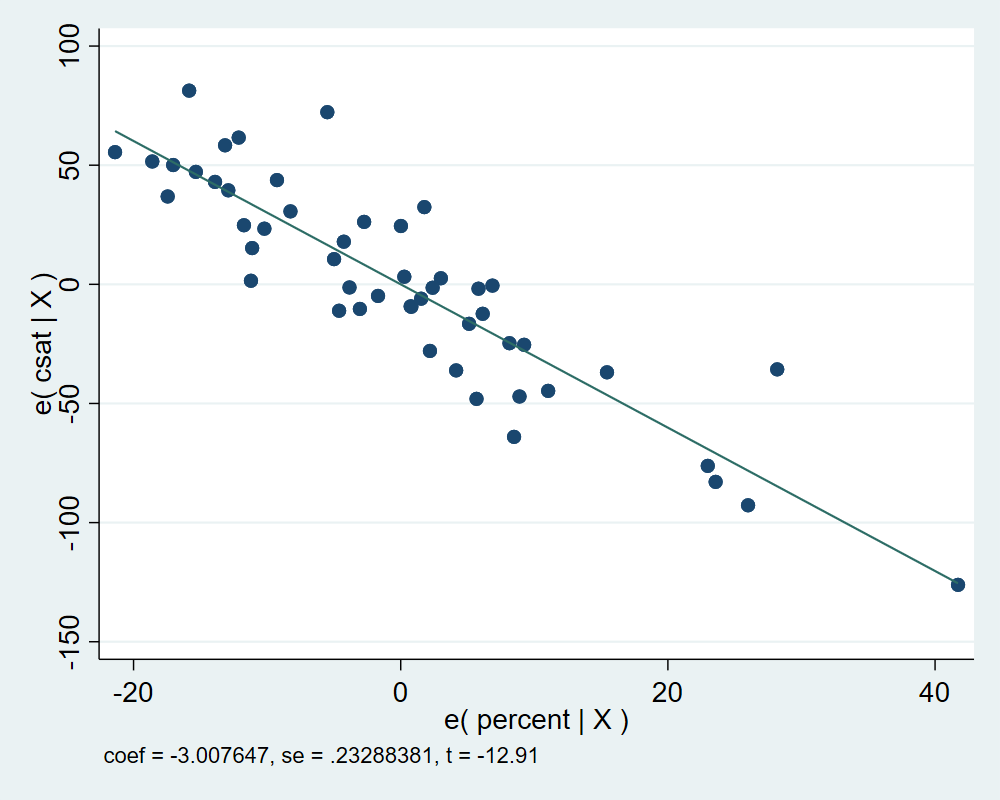

In [38]:
%%stata
avplot percent

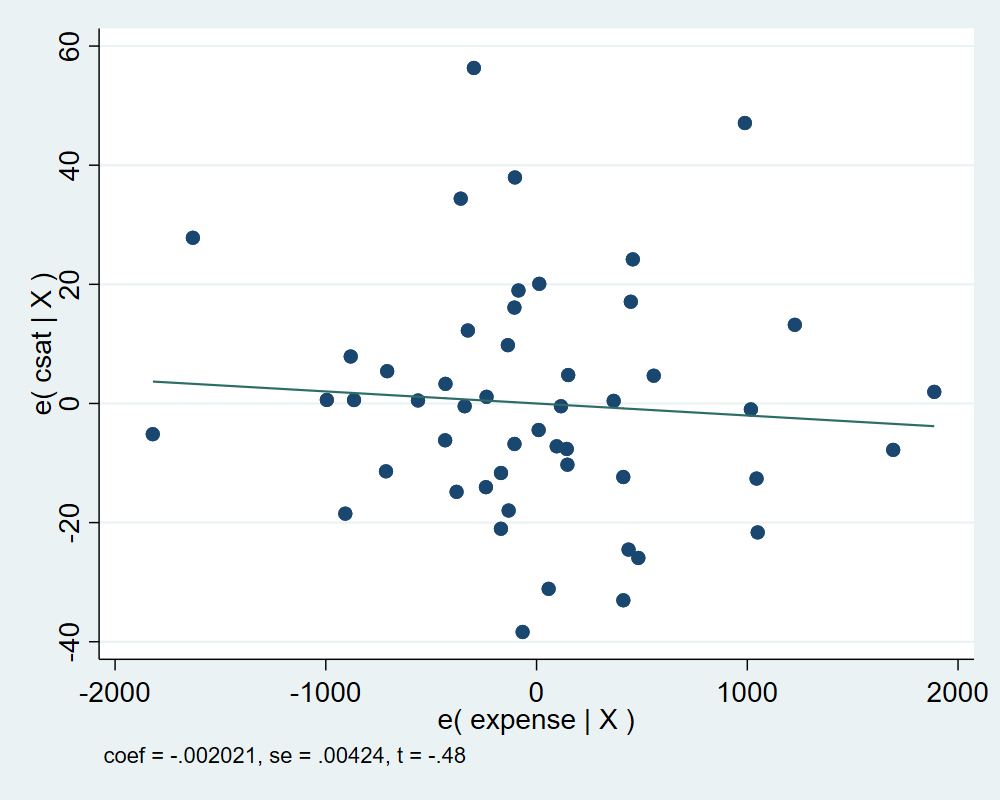

In [39]:
%%stata
avplot expense

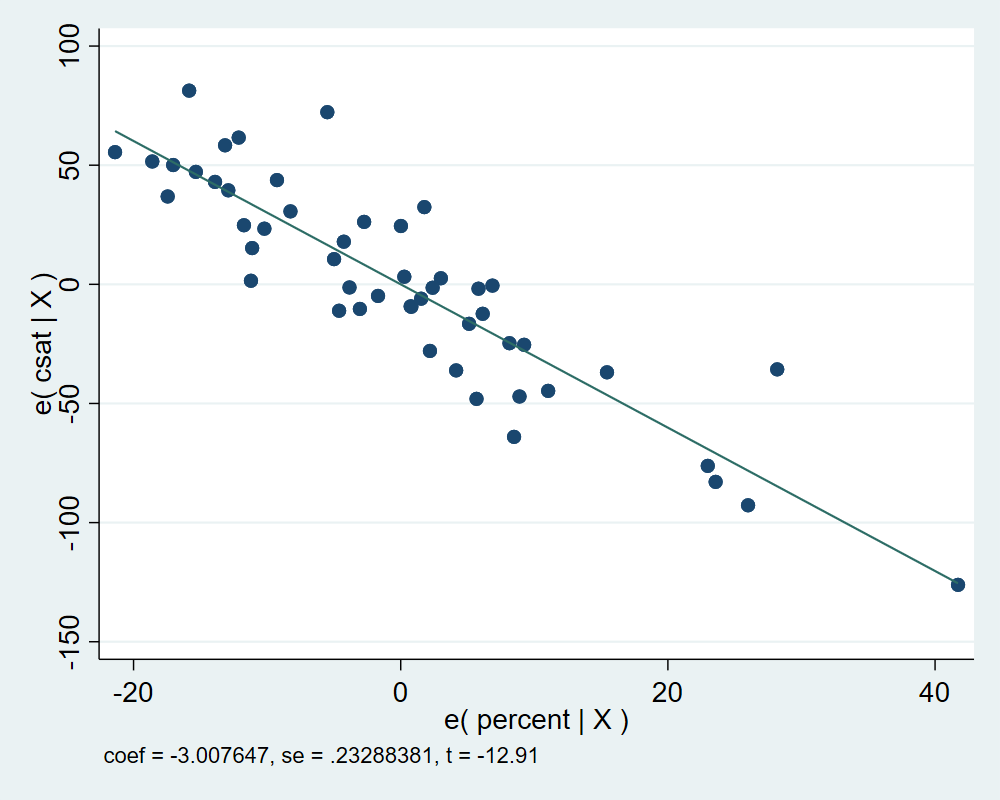

In [40]:
%%stata
avplot percent

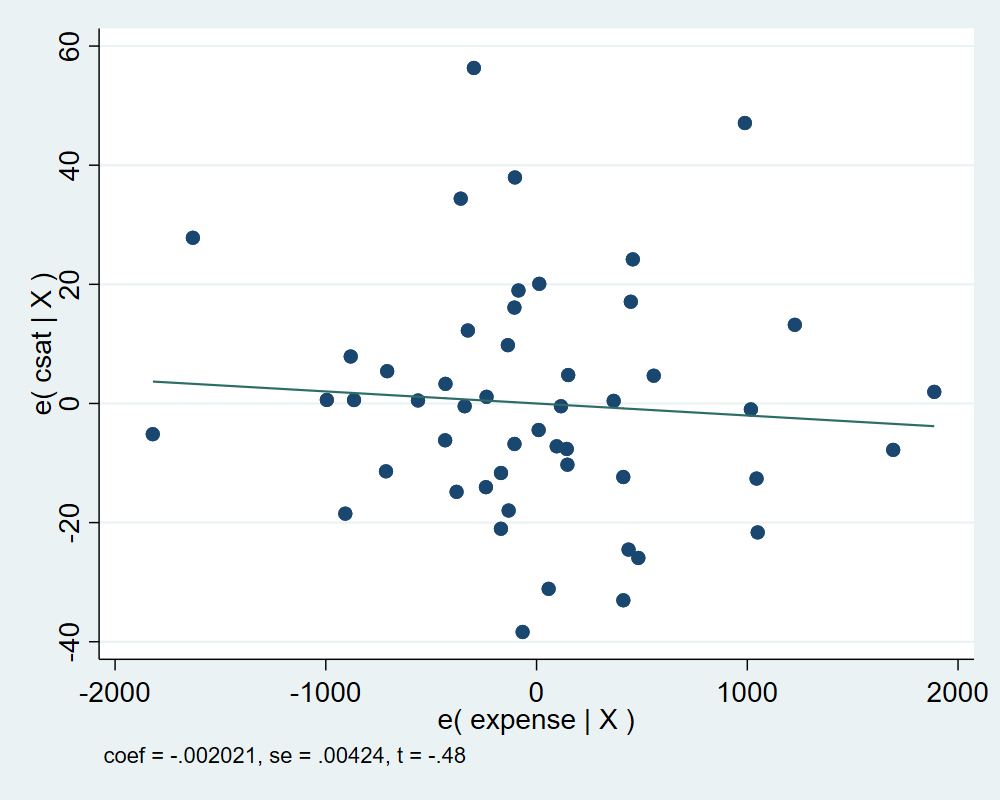

In [41]:
%%stata
avplot expense


The above plots regress each variable against all others; notice the coefficients on each. All data points seem to be in range, and no outliers were observed.

For checking the outliers for all variables of the model, type avplots after regression.


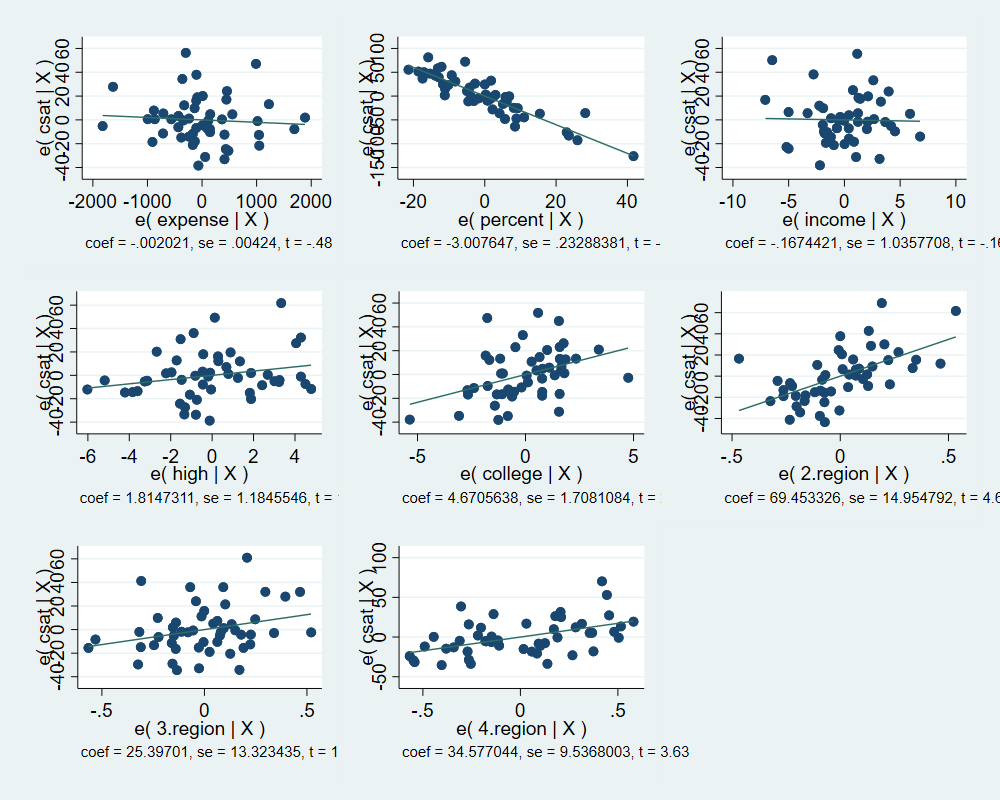

In [42]:
%%stata
avplots



## Testing for normality
Another assumption of the regression model (OLS) that impact the validity of all tests (p, t, and F) is that residuals behave ‘normal’. Residuals (here indicated by the letter “e”) are the difference between the observed values (Y) and the predicted values (Yhat): e = Y –Yhat.

In Stata, after running regression type: predict e, resid. It will generate a variable called “e” (residuals).

Three graphs will help us check for normality in the residuals: kdensity, pnorm, and qnorm.


(1 missing value generated)



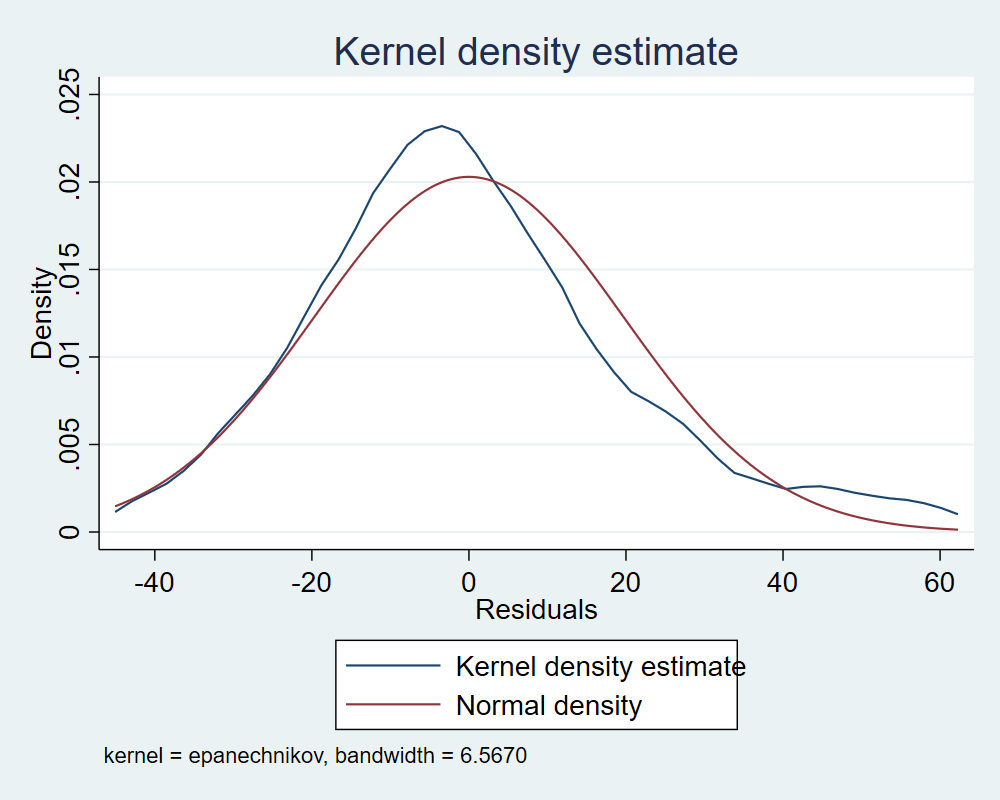

In [43]:
%%stata
predict e,resid
kdensity e, normal



A kernel density plot produces a kind of histogram for the residuals; the option normal overlays a normal distribution to compare. Here residuals seem to follow a normal distribution. Below is an example using histogram.


(bin=7, start=-38.495087, width=13.459616)



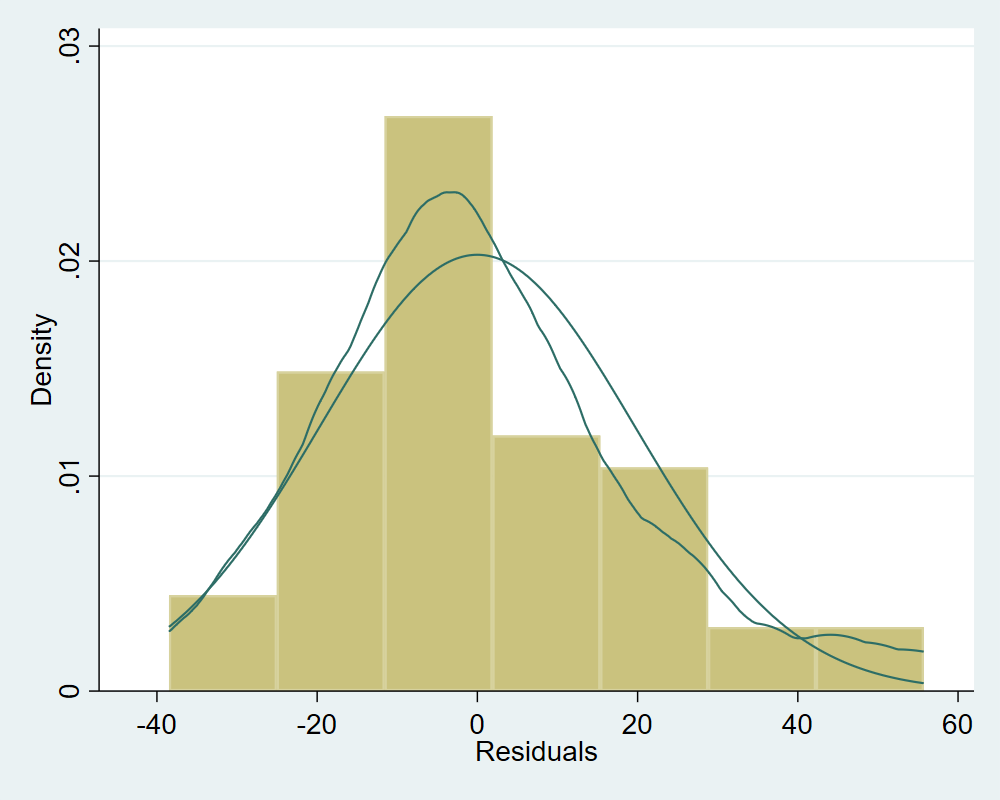

In [44]:
%%stata
histogram e, kdensity normal


If residuals do not follow a ‘normal’ pattern, then you should check for omitted variables, model specification, linearity, and functional forms. In sum, you may need to reassess your model/theory. In practice, normality does not represent much of a problem when dealing with really big samples.

- Standardize normal probability plot (pnorm) checks for non-normality in the middle range of residuals.


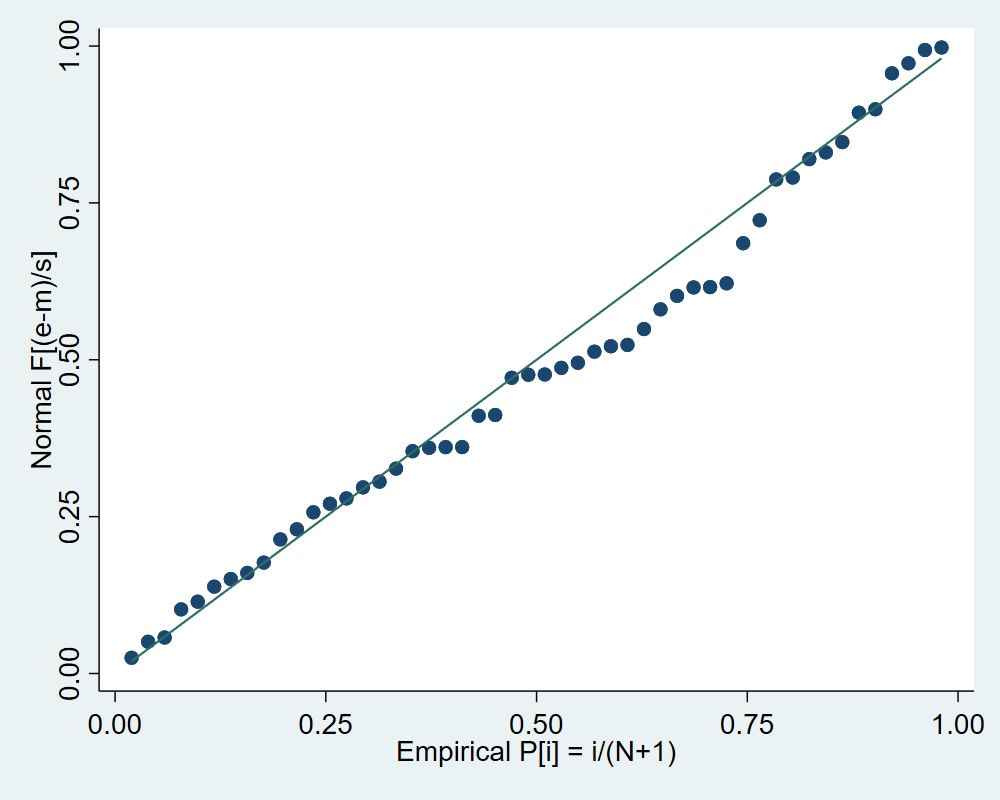

In [45]:
%%stata
pnorm e


The plot is slightly off the line but looks ok.

- Quintile-normal plots (qnorm)check for non-normality in the extremes of the data (tails). It plots quintiles of residuals vs quintiles of a normal distribution.


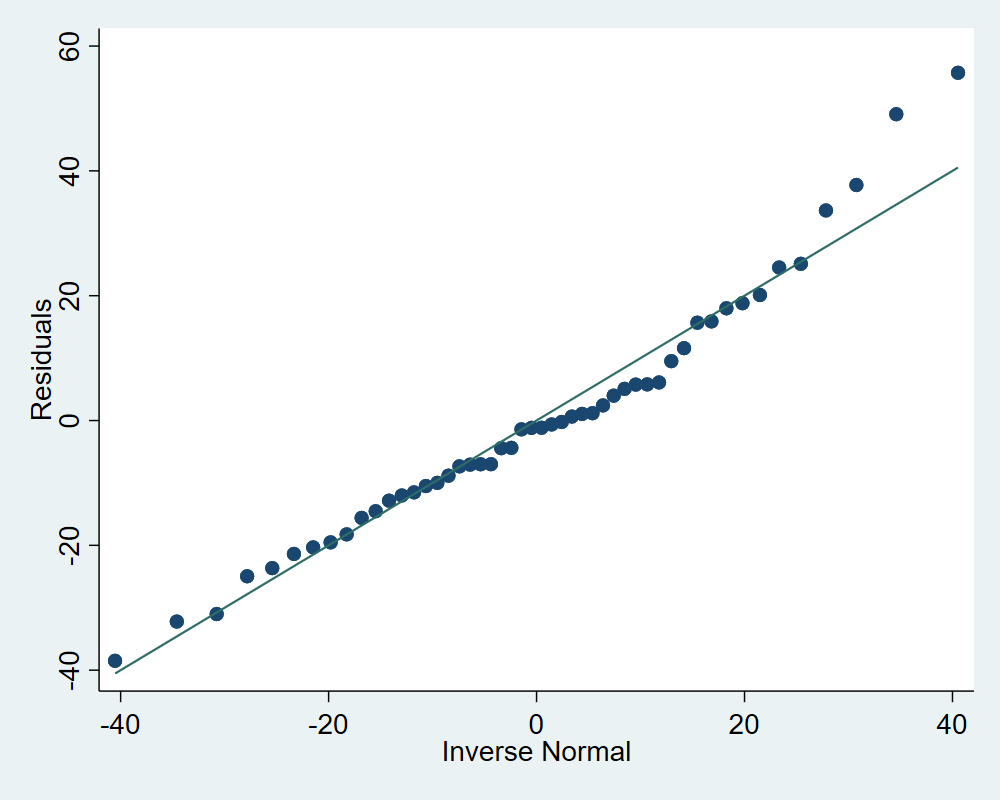

In [46]:
%%stata
qnorm e


Tails are a bit off the normal.

- A non-graphical test is the Shapiro-Wilk test for normality. It tests the hypothesis that the distribution is normal; in this case, the null hypothesis is that the distribution of the residuals is normal. Type


In [47]:
%%stata
swilk e



                   Shapiro–Wilk W test for normal data

    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
           e |         50    0.96693      1.555     0.942    0.17316



. swilk e
                   Shapiro-Wilk W test for normal data
    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
           e |         50    0.96693      1.555     0.942    0.17316
The null hypothesis is that the distribution of the residuals is normal, here the p-value is 0.17 so we fail to reject the null. We conclude then that residuals are normally distributed.

## Joint test (F-test)
To test whether two coefficients are jointly different from 0, use the command test (see Hamilton, 2006, p.175).

To test the null hypothesis that both coefficients do not have any effect on csat (βhigh= 0 and βcollege= 0), type:


In [48]:
%%stata
regress csat expense percent income high college i.region
test high college



      Source |       SS           df       MS      Number of obs   =        50
-------------+----------------------------------   F(8, 41)        =     52.51
       Model |  194023.719         8  24252.9649   Prob > F        =    0.0000
    Residual |  18937.6605        41  461.894159   R-squared       =    0.9111
-------------+----------------------------------   Adj R-squared   =    0.8937
       Total |   212961.38        49  4346.15061   Root MSE        =    21.492

------------------------------------------------------------------------------
        csat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     expense |   -.002021     .00424    -0.48   0.636    -.0105839    .0065419
     percent |  -3.007647   .2328838   -12.91   0.000    -3.477965   -2.537329
      income |  -.1674421   1.035771    -0.16   0.872    -2.259224    1.924339
        high |   1.814731   1.184555     1.53   0.


The p-value is 0.0003; we reject the null and conclude that both variables have indeed a significant effect on SAT.

# Regression: General Guidelines
The following are general guidelines for building a regression model suggested by Gelman and Hill (2007):

- Make sure all relevant predictors are included. These are based on your research question, theory and knowledge on the topic.
- Combine those predictors that tend to measure the same thing (i.e. as an index).
- Consider the possibility of adding interactions (mainly for those variables with large effects)
- Strategy to keep or drop variables:
  - Predictor not significant and has the expected sign -> Keep it
  - Predictor not significant and does not have the expected sign -> Drop it
  - Predictor is significant and has the expected sign -> Keep it
  - Predictor is significant but does not have the expected sign -> Review, you may need more variables, it may be interacting with another variable in the model or there may be an error in the data.
